In [26]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data1.xlsx")
df.head(20)

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
0,Sugar,2012-11-01 00:00:00,1 Kg,173.4,119,119.73,0.6,-30.9
1,Wheat Flour,2012-11-01 00:00:00,2 Kg,149.91,133.62,134.91,1,-10
2,Cooking Fat,2012-11-01 00:00:00,1 KG,241.15,229.05,229.03,0,-5
3,Sifted Maize Flour,2012-11-01 00:00:00,2 Kg,117.33,113.62,114.52,0.8,-2.4
4,Tomatoes,2012-11-01 00:00:00,1 Kg,69.06,58.52,66.85,14.2,-3.2
5,Rice- Grade 2,2012-11-01 00:00:00,1 Kg,102.28,97.8,98.75,1,-3.5
6,Green Grams,2012-11-01 00:00:00,1 Kg,135.56,116.32,119.67,2.9,-11.7
7,Maize Grain -Loose,2012-11-01 00:00:00,1 Kg,43.17,41.86,41.92,0.1,-2.9
8,Cooking Oil,2012-11-01 00:00:00,1 litre,237.16,231.26,230.87,-0.2,-2.7
9,Electricity,2012-11-01 00:00:00,50 Kw/hr,819,657.5,584.5,-11.1,-28.6


In [3]:
# 20 most common commodities
df_valuecounts = df['Commodity Name'].value_counts().head(20)
df_valuecounts 

Electricity               260
Petrol                    140
Diesel                    136
Tomatoes                  109
Potatoes (Irish)          107
Kale-Sukuma Wiki          101
Sugar                      95
Cabbages                   95
Kerosene                   83
Carrots                    65
Maize Grain - Loose        64
Maize Flour - Sifted       60
Spinach                    57
Beef - With Bones          57
Kerosene/Paraffin          53
Beans                      53
Mangoes                    44
Onions                     43
Charcoal                   42
Onion -Leeks and Bulbs     38
Name: Commodity Name, dtype: int64

In [4]:
# checking the info
df.info()

# we will need to convert some col into integers, and the date to date-time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Commodity Name                2488 non-null   object
 1   Date                          2488 non-null   object
 2   Units of Measure              2488 non-null   object
 3   Average Price Previous Year   2488 non-null   object
 4   Average Price Previous Month  2488 non-null   object
 5   Current Average price         2488 non-null   object
 6    % monthly change             2488 non-null   object
 7   % yearly change               2488 non-null   object
dtypes: object(8)
memory usage: 155.6+ KB


In [5]:
 # remove leading/trailing spaces
df.columns = df.columns.str.strip() 
# replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')  

df.columns.tolist()

['Commodity_Name',
 'Date',
 'Units_of_Measure',
 'Average_Price_Previous_Year',
 'Average_Price_Previous_Month',
 'Current_Average_price',
 '%_monthly_change',
 '%_yearly_change']

In [6]:
# List of columns to convert
cols_to_convert = ['Average_Price_Previous_Year','Average_Price_Previous_Month','Current_Average_price',
                   '%_monthly_change','%_yearly_change']

# Cleaning and converting each column
for col in cols_to_convert:
    df[col] = (df[col]
               .astype(str)                     # ensure string type
               .str.replace(',', '', regex=False)  # remove commas
               .str.replace('%', '', regex=False)  # remove percent signs
               .str.strip())                        # remove spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric safely

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
# convert the columns to lowercase
df.columns = df.columns.str.lower()
df.columns.tolist()

['commodity_name',
 'date',
 'units_of_measure',
 'average_price_previous_year',
 'average_price_previous_month',
 'current_average_price',
 '%_monthly_change',
 '%_yearly_change']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   commodity_name                2488 non-null   object        
 1   date                          2487 non-null   datetime64[ns]
 2   units_of_measure              2488 non-null   object        
 3   average_price_previous_year   2466 non-null   float64       
 4   average_price_previous_month  2473 non-null   float64       
 5   current_average_price         2476 non-null   float64       
 6   %_monthly_change              2403 non-null   float64       
 7   %_yearly_change               2461 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 155.6+ KB


In [9]:
# very little in the grandscheme
df.duplicated().sum()

46

In [10]:
# checking null values --- None is missing. Cleaning done
df.isna().sum()

commodity_name                   0
date                             1
units_of_measure                 0
average_price_previous_year     22
average_price_previous_month    15
current_average_price           12
%_monthly_change                85
%_yearly_change                 27
dtype: int64

In [11]:
# checking the data column
df[df['date'].isna()]

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
1048,Product,NaT,Unit of Measure,NaN,NaN,NaN,NaN,NaN


In [12]:
# it appears to have missing data across all columnns and we will drop this row
df.drop(1048, inplace=True)

In [13]:
df[df['average_price_previous_month'].isna()]

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
437,Gas - (LPG),2015-09-01,13 Kg,NaN,NaN,2393.85,0.80,-23.07
439,Electricity,2015-09-01,200\nKW/h,NaN,NaN,3484.54,-5.42,-15.65
2449,Maize Grain - Loose,2025-08-01,1 Kg,59.24,NaN,70.93,-0.40,19.70
2455,Kale-Sukuma Wiki,2025-08-01,1 Kg,79.87,NaN,93.41,NaN,17.00
2458,Electricity,2025-08-01,50 kWh,NaN,NaN,NaN,-2.30,-2.00
2461,House rent - single room,2025-08-01,1 Per Month,NaN,NaN,NaN,0.10,NaN
2462,Gas/LPG,2025-08-01,13 kG,NaN,NaN,NaN,0.40,NaN
2466,Country Bus /Matatu Fare (Mombasa to Nairobi),2025-08-01,1 Ticket,NaN,NaN,NaN,15.40,15.40
2467,Maize Grain - Loose,2025-09-01,1 Kg,59.64,NaN,68.14,-3.90,NaN
2469,Kale-Sukum a W iki,2025-09-01,1 Kg,NaN,NaN,92.48,-1.00,15.00


In [14]:
# Recompute missing % changes
df['%_monthly_change'] = df['%_monthly_change'].fillna(
    ((df['current_average_price'] - df['average_price_previous_month']) / df['average_price_previous_month']) * 100)

df['%_yearly_change'] = df['%_yearly_change'].fillna(
    ((df['current_average_price'] - df['average_price_previous_year']) / df['average_price_previous_year']) * 100)

# Recompute missing prices (inverse calculation)
df['average_price_previous_month'] = df['average_price_previous_month'].fillna(
    df['current_average_price'] / (1 + (df['%_monthly_change'] / 100)))

df['average_price_previous_year'] = df['average_price_previous_year'].fillna(
    df['current_average_price'] / (1 + (df['%_yearly_change'] / 100)))

# Check remaining nulls
df.isna().sum()

commodity_name                   0
date                             0
units_of_measure                 0
average_price_previous_year     10
average_price_previous_month     8
current_average_price           11
%_monthly_change                 4
%_yearly_change                  6
dtype: int64

In [15]:
df[df['%_yearly_change'].isna()]

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
2461,House rent - single room,2025-08-01,1 Per Month,NaN,NaN,NaN,0.100000,NaN
2462,Gas/LPG,2025-08-01,13 kG,NaN,NaN,NaN,0.400000,NaN
2473,W h eat Flou r-W h it e,2025-09-01,2 Kg,NaN,NaN,NaN,NaN,NaN
2475,On ion -Leeks and Bu lb s,2025-09-01,1 Kg,NaN,108.37,109.37,0.922765,NaN
2476,Tom atoes,2025-09-01,1 Kg,NaN,85.88,86.88,1.200000,NaN
2485,Electricity,2025-09-01,50 kWh,NaN,1259.65,NaN,1.100000,NaN


In [16]:
# dropping the null values
df = df.dropna()
df 

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
0,Sugar,2012-11-01,1 Kg,173.400000,119.00,119.73,0.600000,-30.900000
1,Wheat Flour,2012-11-01,2 Kg,149.910000,133.62,134.91,1.000000,-10.000000
2,Cooking Fat,2012-11-01,1 KG,241.150000,229.05,229.03,0.000000,-5.000000
3,Sifted Maize Flour,2012-11-01,2 Kg,117.330000,113.62,114.52,0.800000,-2.400000
4,Tomatoes,2012-11-01,1 Kg,69.060000,58.52,66.85,14.200000,-3.200000
...,...,...,...,...,...,...,...,...
2481,Kerosen e/Paraffin,2025-09-01,1 Litre,159.100000,156.76,155.96,-0.510334,-2.000000
2482,Gas/LPG,2025-09-01,13 kG,3196.399594,3158.35,3151.65,-0.212136,-1.400000
2484,Electricity,2025-09-01,200 kWh,5717.221655,5539.54,5597.16,1.000000,-2.100000
2486,Pet rol,2025-09-01,1 Litre,189.377551,186.37,185.59,-0.418522,-2.000000


In [17]:
# validating there are no missing values
df.isna().sum()

commodity_name                  0
date                            0
units_of_measure                0
average_price_previous_year     0
average_price_previous_month    0
current_average_price           0
%_monthly_change                0
%_yearly_change                 0
dtype: int64

In [18]:
# lets engineer the features

In [19]:
# Keep key columns
df = df[['commodity_name', 'date', 'units_of_measure', 'current_average_price']].copy()
df.columns

Index(['commodity_name', 'date', 'units_of_measure', 'current_average_price'], dtype='object')

In [20]:
# Group by Commodity and Month to get monthly average price per commodity
# average prices per commodity per month
df_grouped = (df.groupby(['commodity_name', 'units_of_measure', pd.Grouper(key='date', freq='M')])
              ['current_average_price'].mean().reset_index())

# used the average incase the commodity and its unit of measure is similar in the given month
# Each commodity now has one price per month.

In [21]:
df_grouped['commodity_name'].value_counts().head(20)

Electricity               252
Petrol                    133
Diesel                    128
Tomatoes                  104
Potatoes (Irish)          103
Kale-Sukuma Wiki           94
Sugar                      92
Cabbages                   92
Kerosene                   77
Carrots                    62
Maize Grain - Loose        62
Maize Flour - Sifted       58
Beef - With Bones          57
Spinach                    53
Beans                      51
Kerosene/Paraffin          51
Mangoes                    44
Onions                     41
Charcoal                   39
Onion -Leeks and Bulbs     37
Name: commodity_name, dtype: int64

In [22]:
# weights for the 20 most tracked products
raw_weights = {'Electricity': 1.2656,
           'Petrol': 1.2003,
           'Diesel': 0.12,
           'Tomatoes': 1.3058,
           'Potatoes (Irish)': 0.7482,
           'Kale-Sukuma Wiki': 0.5742,
           'Sugar': 1.7696, 
           'Cabbages': 0.373,
           'Kerosene': 0.5573,
           'Carrots': 0.1705,
           'Maize Grain - Loose': 0.6031,
           'Maize Flour - Sifted': 0.4344,
           'Spinach': 0.2465,
           'Beef - With Bones': 3.4592, 
           'Kerosene/Paraffin': 0.5573,
           'Beans': 0.7163,
           'Mangoes': 0.1738,
           'Onions':  0.6458,
           'Charcoal': 0.8649,
           'Onion -Leeks and Bulbs': 0.6458} 

# residual weight for "other" category
total_raw = sum(raw_weights.values())
# roughly 5% of total basket for untracked items
residual = max(0, total_raw * 0.05) 
raw_weights['other'] = residual

# Normalize so that total = 1 (sum of all weights = 1)
weights = {k: v / sum(raw_weights.values()) for k, v in raw_weights.items()}

print(f"Total normalized weight: {sum(weights.values()):.4f}")


# merging weights with the data
# mapping weights to each commodity
df_grouped['weight'] = df_grouped['commodity_name'].map(weights)

# any commodity not found will be assigned 'other' weight
df_grouped['weight'] = df_grouped['weight'].fillna(weights['other'])


Total normalized weight: 1.0000


The weighting scheme applies the residual method, where “other” commodities are assigned the remaining share of the basket after accounting for the 20 most frequently tracked products. This ensures that all weights sum to 1 (or 100%), preserving proportionality while representing untracked low-consumption goods.

The residual is set to approximately 5% of the total expenditure weight, consistent with household consumption surveys that allocate small shares to miscellaneous goods and infrequently purchased items.

In [23]:
# Compute weighted price index per month
# based on the weights-to get the weighted index
df_grouped['weighted_price'] = df_grouped['current_average_price'] * df_grouped['weight']

# Aggregate by date (sum of weighted prices)
weighted_index = (df_grouped.groupby('date')['weighted_price'].sum()
                  .reset_index())

In [24]:
# Normalize index (Base = 100 for first month)
base_value = weighted_index['weighted_price'].iloc[0]
weighted_index['price_index'] = (weighted_index['weighted_price'] / base_value) * 100

# Compute monthly inflation rate (% change)- inflation tracker
weighted_index['mom_inflation_pct'] = weighted_index['price_index'].pct_change() * 100

# Preview first 12 months
print(weighted_index.head(12))

         date  weighted_price  price_index  mom_inflation_pct
0  2012-11-30      471.607130   100.000000                NaN
1  2012-12-31      445.775522    94.522643          -5.477357
2  2013-01-31      438.136608    92.902880          -1.713623
3  2013-03-31      377.348265    80.013265         -13.874290
4  2013-04-30      383.245139    81.263644           1.562714
5  2013-05-31       89.709819    19.022151         -76.592053
6  2013-06-30       75.247451    15.955537         -16.121276
7  2013-07-31      143.074062    30.337553          90.138084
8  2013-08-31      142.931565    30.307338          -0.099597
9  2013-09-30      212.528966    45.064833          48.692814
10 2013-10-31      203.532754    43.157268          -4.232934
11 2013-11-30      272.696927    57.822902          33.981839


## Inflation Trends Based on Weighted Commodity Prices

The chart below shows movements in a composite price index derived from selected consumer commodities.  
Each commodity is weighted according to its relative importance in the average household’s spending pattern.  
The index tracks monthly changes in overall price levels and provides an alternative view of inflation trends based on market data.

The first month in the dataset serves as the base period (Index = 100).  
An upward movement in the index reflects a general increase in prices, while a decline indicates easing price pressures.  
Monthly percentage changes (month-on-month inflation) help to highlight short-term fluctuations, particularly in food and energy items, which tend to be more volatile.

While this measure does not replace the official CPI published by the Kenya National Bureau of Statistics, it provides a useful early signal of inflationary trends using observed retail prices across key commodities in Kenya’s main markets.


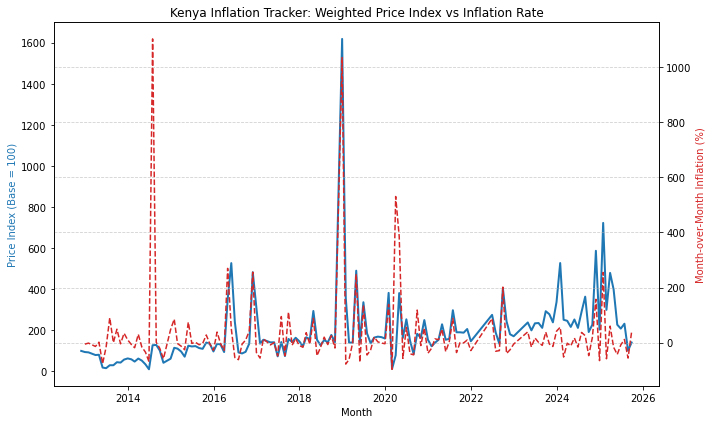

In [27]:
# Inflation tracker - weighted price index vs inflation rate
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot price index
ax1.plot(weighted_index['date'], weighted_index['price_index'], color='tab:blue', linewidth=2)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price Index (Base = 100)', color='tab:blue')

# Plot inflation rate on second axis
ax2 = ax1.twinx()
ax2.plot(weighted_index['date'], weighted_index['mom_inflation_pct'], color='tab:red', linestyle='--')
ax2.set_ylabel('Month-over-Month Inflation (%)', color='tab:red')

plt.title('Kenya Inflation Tracker: Weighted Price Index vs Inflation Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Month-on-month inflation (red line) remained relatively contained except during a few pronounced spikes in 2015,2019, and 2021, reflecting isolated price shocks. In recent months, both the price index and inflation rate have shown signs of stabilization, implying a modest easing of price pressures as supply conditions improved and market dynamics normalized.

Overall, the data suggests that while inflationary pressures persist, they are largely driven by transient factors rather than structural price movements.


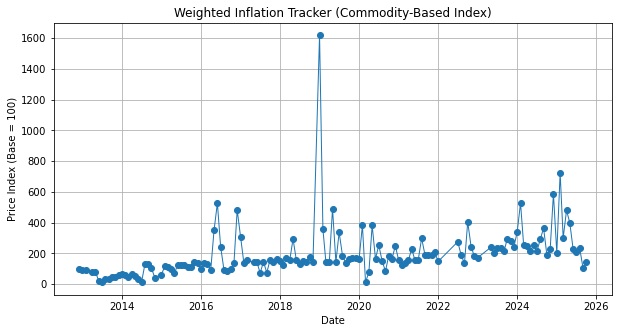

In [28]:
# Plot Inflation Index
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(weighted_index['date'], weighted_index['price_index'], marker='o', linewidth=1)
plt.title("Weighted Inflation Tracker (Commodity-Based Index)")
plt.xlabel("Date")
plt.ylabel("Price Index (Base = 100)")
plt.grid(True)
plt.show()

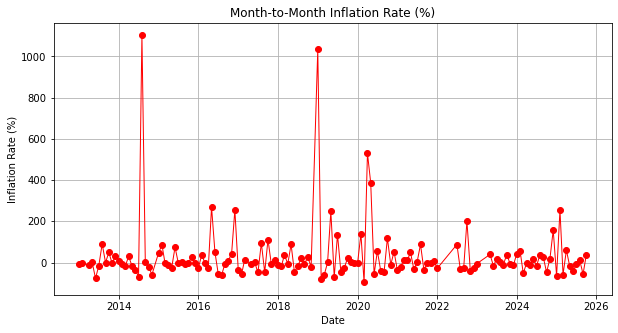

In [29]:
# Plot Month-to-Month Inflation 
plt.figure(figsize=(10, 5))
plt.plot(weighted_index['date'], weighted_index['mom_inflation_pct'], color='red', linewidth=1, marker='o')
plt.title("Month-to-Month Inflation Rate (%)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.tight_layout
plt.show()


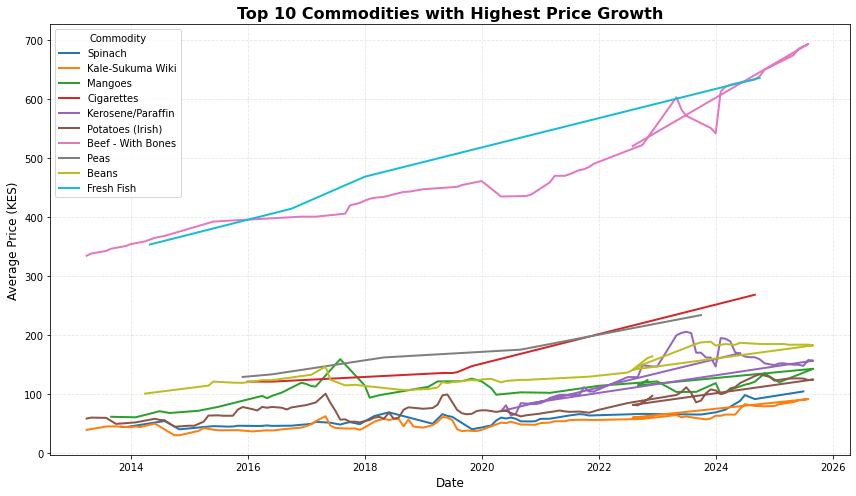

,first,last,change,pct_change
commodity_name,,,,
Spinach,44.6900,104.52,59.8300,133.877825
Kale-Sukuma Wiki,39.3200,91.62,52.3000,133.011190
Mangoes,61.5400,142.97,81.4300,132.320442
Cigarettes,121.1800,268.47,147.2900,121.546460
Kerosene/Paraffin,71.0194,156.76,85.7406,120.728421
Potatoes (Irish),58.5600,124.71,66.1500,112.961066
Beef - With Bones,334.7400,693.85,359.1100,107.280277
Peas,129.1000,234.04,104.9400,81.285825
Beans,100.8900,182.62,81.7300,81.009020


In [30]:
# Compute total change per commodity (latest - earliest)
trend_df = (df_grouped.sort_values(['commodity_name', 'date'])
            .groupby('commodity_name')['current_average_price']
            .agg(['first', 'last'])
            .assign(change=lambda x: x['last'] - x['first'],
            pct_change=lambda x: (x['last'] - x['first']) / x['first'] * 100)
            .sort_values('pct_change', ascending=False))

# Pick top 5 commodities with highest % increase
top_trending = trend_df.head(10).index
df_top_trending = df_grouped[df_grouped['commodity_name'].isin(top_trending)]

# Plot
plt.figure(figsize=(12, 7))
for name in top_trending:
    temp = df_top_trending[df_top_trending['commodity_name'] == name]
    plt.plot(temp['date'], temp['current_average_price'], label=name, linewidth=2)

plt.title("Top 10 Commodities with Highest Price Growth", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price (KES)", fontsize=12)
plt.legend(title="Commodity", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# growth rates
trend_df.head(10)

In [31]:
# Export results 
weighted_index.to_csv("weighted_inflation_tracker.csv", index=False)

In [32]:
weighted_index.columns.tolist()

['date', 'weighted_price', 'price_index', 'mom_inflation_pct']

In [33]:
# I couldn't add the commodity name to this df (weighted_index) because both price_index and mom_inflation_pct are monthly
# aggregations. 
# if I had choose not to aggregate, this inflation tracker would not match that used by the CBK or published by KNBS.

# although if we want to trace what products moved the most in a particular month, use the df_merged data instead. Useful
# for analysis. To make work easier, I think we will create a function that does that for use later, during modeling.

# Now the features are engineered.